<a href="https://colab.research.google.com/github/Geetika2282/Deep-Learning/blob/main/8016_Geetika_DNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Name: Geetika Kanwar
- PRN : 240840128005
- Date : 20-Nov-2024

In [91]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [92]:
###----------------
### Hyperparameters
###----------------

# set location of input files
inpDir = os.path.join('..', '..', 'input')

outDir = os.path.join('..', 'output')

# define and set random state
RANDOM_STATE = 24

np.random.RandomState(seed=RANDOM_STATE) # Set Random Seed for reproducible  results

RandomState(MT19937) at 0x7A4BAB54AE40

In [93]:
# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 4),
          'axes.labelsize': 'medium',
          'axes.titlesize':'medium',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium',
          'savefig.dpi': 150,
          'image.cmap': plt.cm.coolwarm,
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 2,
          'legend.numpoints' : 1
         }


plt.rcParams.update(params)

CMAP = plt.cm.coolwarm

plt.style.use('ggplot')



# EDA part

In [94]:
df_cancer=pd.read_csv(os.path.join(inpDir, '/content/breast_cancer_mod.csv'))

In [95]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,1,0,1,1,0
3,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [96]:
df_cancer.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [97]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   mean radius              569 non-null    int64
 1   mean texture             569 non-null    int64
 2   mean perimeter           569 non-null    int64
 3   mean area                569 non-null    int64
 4   mean smoothness          569 non-null    int64
 5   mean compactness         569 non-null    int64
 6   mean concavity           569 non-null    int64
 7   mean concave points      569 non-null    int64
 8   mean symmetry            569 non-null    int64
 9   mean fractal dimension   569 non-null    int64
 10  radius error             569 non-null    int64
 11  texture error            569 non-null    int64
 12  perimeter error          569 non-null    int64
 13  area error               569 non-null    int64
 14  smoothness error         569 non-null    int64
 15  compac

In [98]:
# Counts the total number of occurrences for each category in the 'target' column
df_cancer['target'].value_counts()
# Returns a Pandas Series with category values as the index and their counts as the values

,count
target,
1,357
0,212


In [99]:
df_cancer['target'].value_counts().index

Index([1, 0], dtype='int64', name='target')

In [100]:
df_cancer['target'].value_counts().values

array([357, 212])

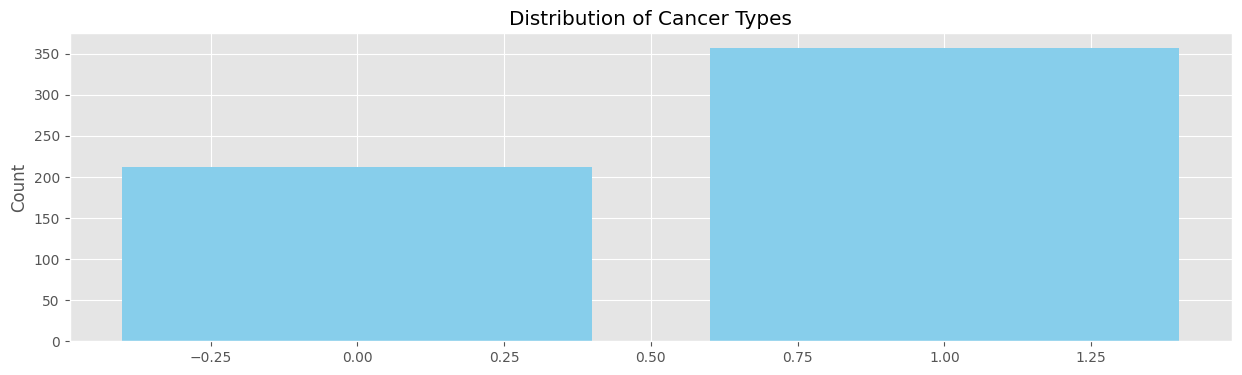

In [101]:
# Bar plot for both the unique categories of 'target' column

labels = ['Malignant', 'Benign']

fig, ax = plt.subplots()
ax.bar(df_cancer['target'].value_counts().index,
       df_cancer['target'].value_counts().values, color='skyblue');


ax.set_ylabel('Count')
ax.set_title('Distribution of Cancer Types')
plt.show()

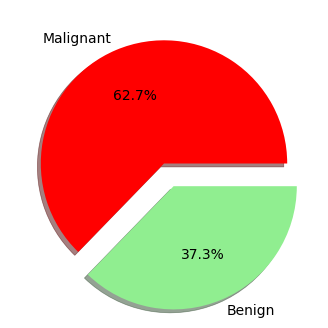

In [102]:
fig, ax = plt.subplots()
labels = ['Malignant', 'Benign']
explode = (0.0, 0.2)
colors = ['red', 'lightgreen']

ax.pie(df_cancer['target'].value_counts(),
       labels=labels,
       autopct='%0.1f%%',
       explode=explode,
       colors=colors,
       shadow=True,startangle=0);

# ax.axis('equal')
plt.show()

# Split the data in train, test

In [103]:
X = df_cancer.drop('target', axis=1)
y = df_cancer['target']

In [104]:
# divide X, y in training and test data so can apply algorithms next
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE,stratify=y)
print(f"X_train shape: {X_train.shape}\nX_test shape: {X_test.shape}\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")


X_train shape: (398, 30)
X_test shape: (171, 30)
y_train shape: (398,)
y_test shape: (171,)


In [105]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
166,1,1,1,1,0,1,1,1,1,1,...,1,0,1,1,0,1,1,1,1,1
269,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
160,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
423,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
400,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [106]:
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
68,1,1,1,1,1,0,0,1,1,1,...,1,1,1,1,0,0,0,0,1,1
288,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
113,1,1,1,1,0,1,1,1,0,1,...,1,0,1,1,0,1,1,0,1,1
499,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
486,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [107]:
y_train.head()

,target
166,1
269,1
160,1
423,1
400,1


In [108]:
 y_test.head()

,target
68,0
288,0
113,0
499,1
486,1


In [109]:
# Creates a new column called 'total' in the X_train DataFrame. This column contains the sum of all numerical values across each row in X_train.
X_train['total'] = X_train.astype(np.int16).sum(axis=1)
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total
166,1,1,1,1,0,1,1,1,1,1,...,0,1,1,0,1,1,1,1,1,27
269,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,29
160,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,27
423,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,30
400,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,30


In [110]:
# Adds a new column named 'target' to X_train, containing the corresponding target values from y_train.
X_train['target'] = y_train
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
166,1,1,1,1,0,1,1,1,1,1,...,1,1,0,1,1,1,1,1,27,1
269,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,29,1
160,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,27,1
423,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,30,1
400,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,28,1
322,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,29,0
175,1,1,1,1,1,0,1,1,0,0,...,1,1,1,1,1,1,1,1,27,1
537,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,30,1


In [111]:
# Sorts the rows of X_train in ascending order based on the values in the 'total' column.
X_train.sort_values(by='total', inplace=True)
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,1,12,0
2,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,1,13,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,13,0
5,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,1,1,15,0
6,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,1,1,15,0


In [112]:
X_test['total'] = X_test.astype(np.int16).sum(axis=1)
X_test['target'] =y_test
X_test.sort_values(by='total', inplace=True)
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,14,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,14,0
7,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,15,0
8,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,15,0
12,0,0,0,1,1,0,1,1,0,1,...,0,1,1,0,0,0,0,1,16,0


In [113]:
X_train.shape[1]

32

In [114]:
accuracy = {}

for b in range(X_train.shape[1]):
  # Creates a column to pred which returns boolean based on if target>b
    X_train['pred'] = X_train['total'] >= b
    # creates a dictionary, with key as b, value as accuracy score
    accuracy[b] = accuracy_score(y_true= X_train['target'], y_pred = X_train['pred'])

In [115]:
accuracy

{0: 0.628140703517588,
 1: 0.628140703517588,
 2: 0.628140703517588,
 3: 0.628140703517588,
 4: 0.628140703517588,
 5: 0.628140703517588,
 6: 0.628140703517588,
 7: 0.628140703517588,
 8: 0.628140703517588,
 9: 0.628140703517588,
 10: 0.628140703517588,
 11: 0.628140703517588,
 12: 0.628140703517588,
 13: 0.6306532663316583,
 14: 0.635678391959799,
 15: 0.635678391959799,
 16: 0.6407035175879398,
 17: 0.6482412060301508,
 18: 0.6582914572864321,
 19: 0.6633165829145728,
 20: 0.6733668341708543,
 21: 0.6909547738693468,
 22: 0.7085427135678392,
 23: 0.7336683417085427,
 24: 0.7688442211055276,
 25: 0.7964824120603015,
 26: 0.8190954773869347,
 27: 0.8391959798994975,
 28: 0.8417085427135679,
 29: 0.8190954773869347,
 30: 0.7336683417085427,
 31: 0.37185929648241206}

In [116]:
# Check pred column
X_train.sample(30)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target,pred
414,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,30,1,False
495,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,30,1,False
188,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,27,1,False
31,1,1,1,1,1,1,0,1,0,0,...,1,0,1,0,0,0,1,20,1,False
556,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,30,1,False
432,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,30,1,False
318,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,29,1,False
109,1,1,1,1,0,1,1,0,0,1,...,1,0,1,1,0,1,1,25,0,False
99,0,1,0,1,1,1,1,0,1,1,...,1,1,1,1,0,1,1,24,0,False
82,1,1,1,1,0,1,0,0,0,1,...,1,0,1,1,0,1,1,23,0,False


In [117]:
# accuracy.get(key) retrieves the corresponding value (the accuracy score).
# to get best accuracy out of all
best_b = max(accuracy, key=accuracy.get)
best_b

28

# On Testing data

In [118]:
X_test['pred'] = X_test['total'] >= best_b
accuracy_score(y_true= X_test['target'], y_pred = X_test['pred'])

0.8713450292397661